In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\subha\OneDrive\Desktop\Play Store\CleanedDataSet.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [17]:
df.drop_duplicates(subset=['App'],keep='first',inplace=True)

In [101]:
df.shape

(9659, 16)

## Finding Categorical And Numerical Columns In DataFrame

In [22]:
Categorical_Data=[feature for feature in df.columns if df[feature].dtype=='O']
Numerical_Data=[feature for feature in df.columns if df[feature].dtype!='O']


print(f"Categorical Data in Play Store Dataset is {Categorical_Data}")
print("____________________________________________________")
print(f"Numerical Data in Play Store Dataset is {Numerical_Data}")

Categorical Data in Play Store Dataset is ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
____________________________________________________
Numerical Data in Play Store Dataset is ['Rating', 'Reviews', 'Installs', 'Price', 'Day', 'Month', 'Year']


Finding Outliers Using KDE plot for Numerical Data

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

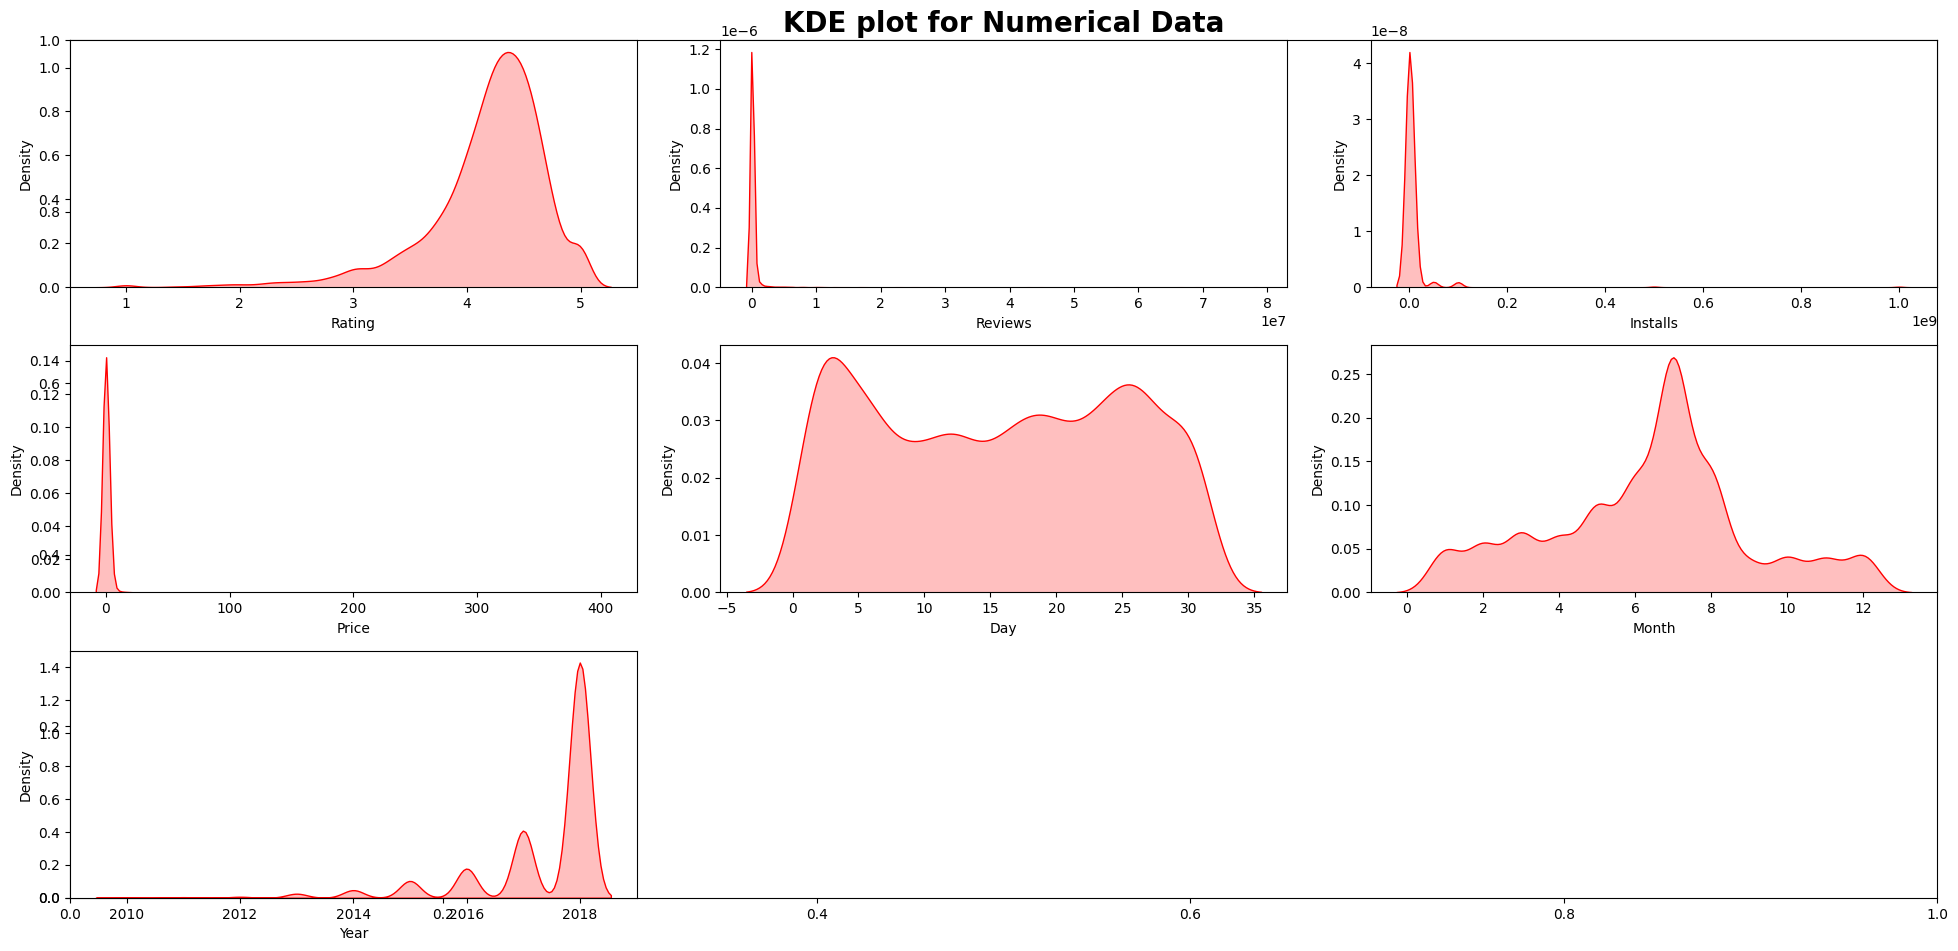

In [28]:
plt.figure(figsize=(20,10))
plt.title("KDE plot for Numerical Data",fontsize=20,fontweight='bold')
for i in range(len(Numerical_Data)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[Numerical_Data[i]],fill=True,color='r')
    plt.xlabel(Numerical_Data[i])
    plt.tight_layout()


## Observation
- Right_Skewed(Outliers):["Reviews","Installs","Price","Day"] has some outliers which can effect result
- Left_skewed:["Rating","Month","Year"]

C:\Users\subha\AppData\Local\Temp\ipykernel_22124\1794084568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette='Set2')
C:\Users\subha\AppData\Local\Temp\ipykernel_22124\1794084568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette='Set2')


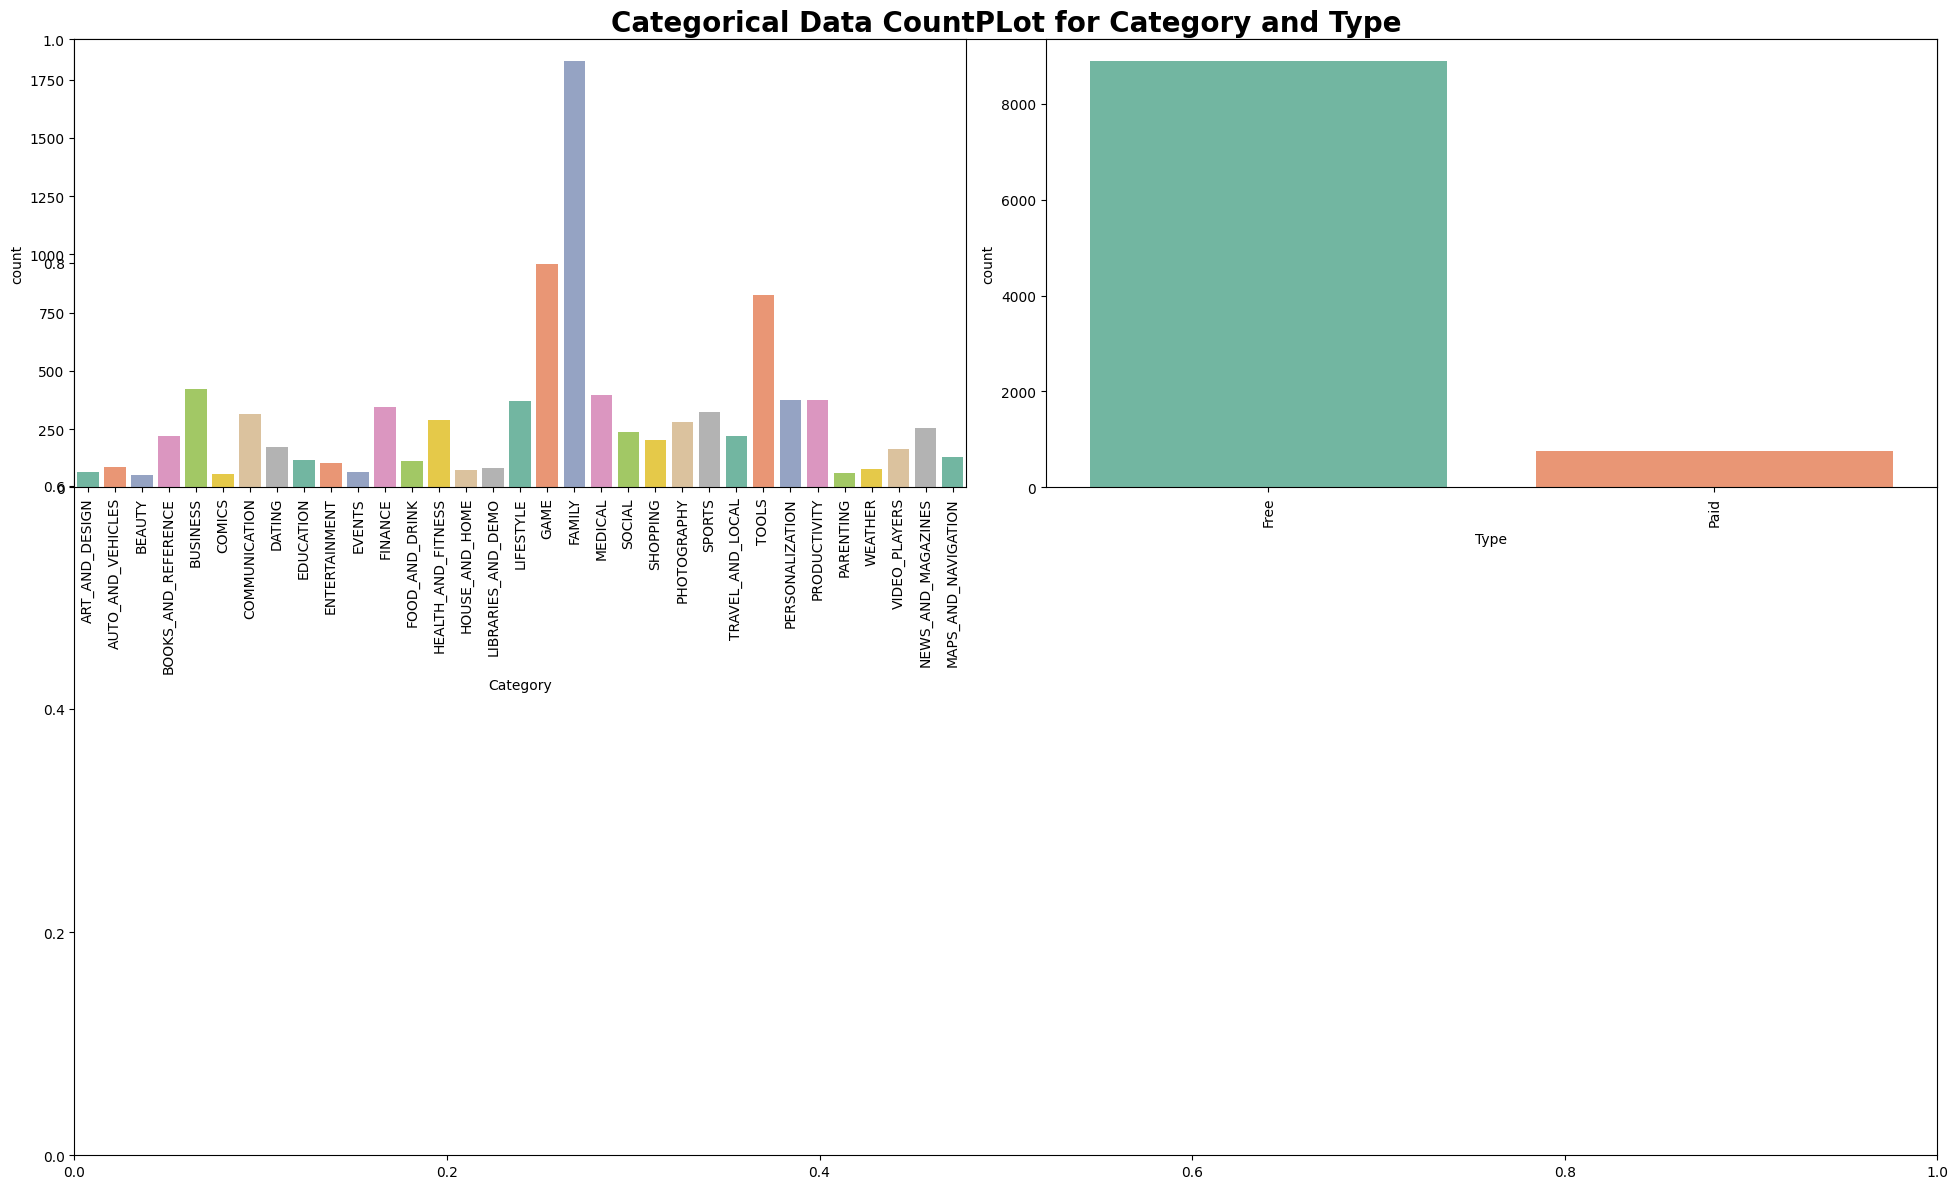

In [44]:
plt.figure(figsize=(20,12))
plt.title("Categorical Data CountPLot for Category and Type",fontsize=20,fontweight='bold')
category=['Category','Type']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]],palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=90)
    plt.tight_layout()


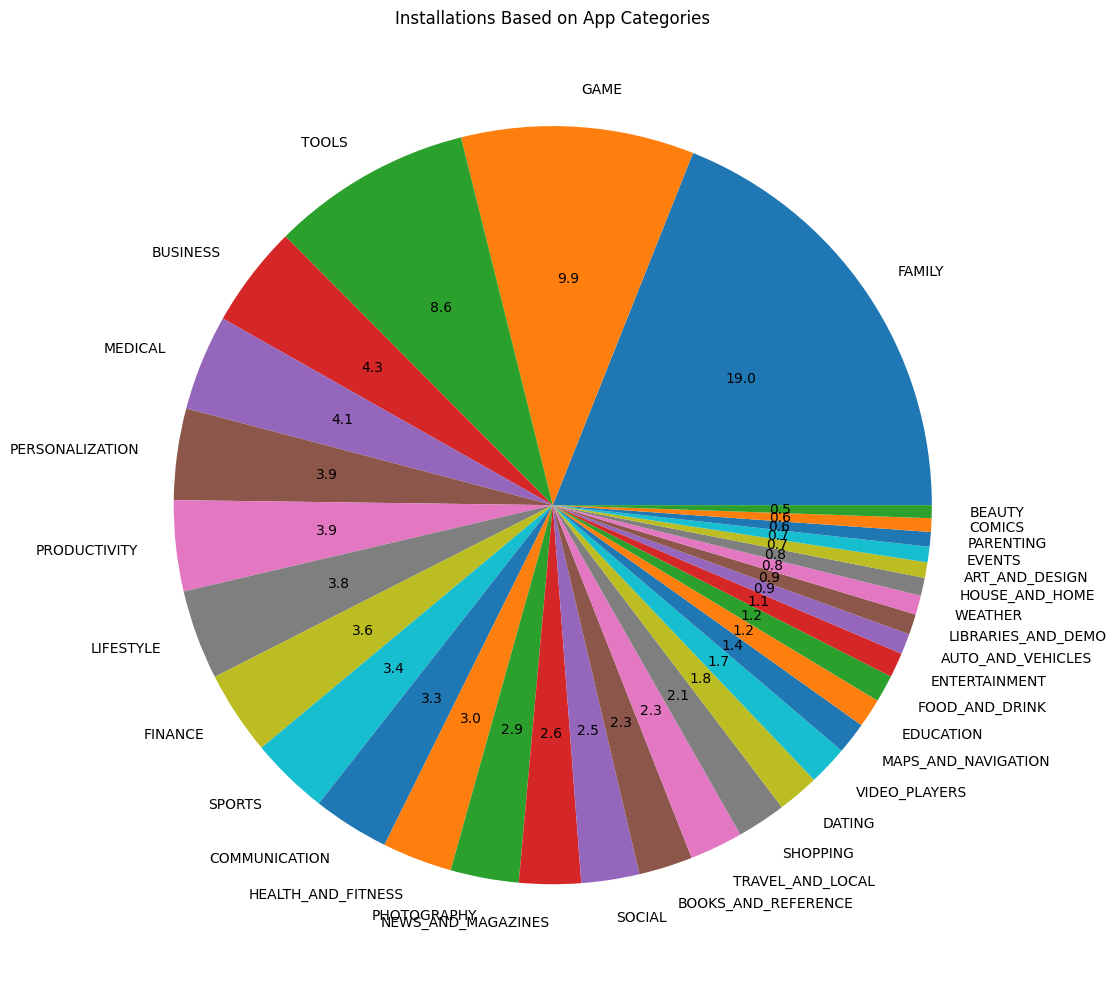

In [57]:
#Installations Based on App Categories
count=df['Category'].value_counts()
plt.figure(figsize=(30,10))
plt.title("Installations Based on App Categories")
plt.pie(count,labels=count.index,autopct='%1.1f')
plt.tight_layout()

# Observations
- There are more apps in playstore for Family,Games and Tools
- Where Beauty,Comics And Parenting kind of apps are less in play store

In [65]:
#Top 10 category in playstore
categories=pd.DataFrame(df['Category'].value_counts())
categories.rename(columns={'Category':'Count'},inplace=True)
categories

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


C:\Users\subha\AppData\Local\Temp\ipykernel_22124\1495754546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories.index[:10],y='count',data=categories[:10],palette='Set2')


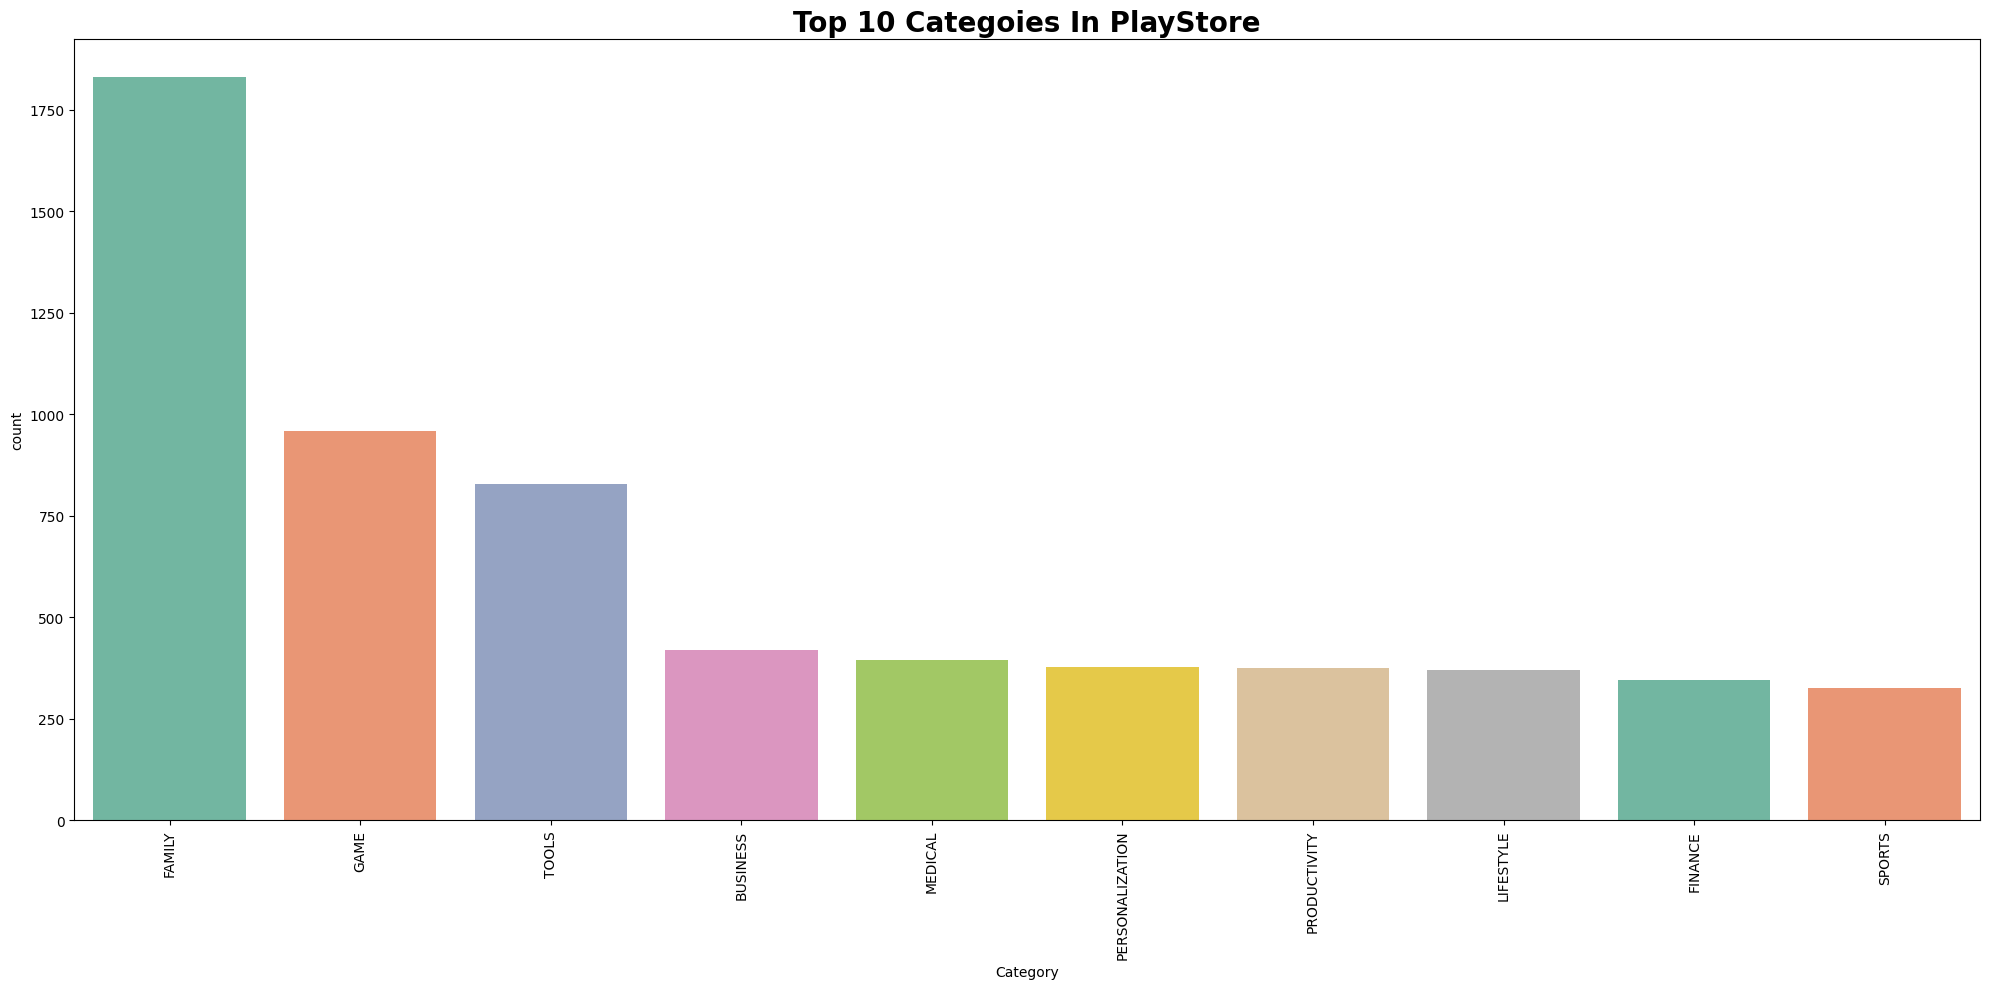

In [69]:
plt.figure(figsize=(20,10))
plt.title("Top 10 Categoies In PlayStore",fontsize=20,fontweight='bold')
sns.barplot(x=categories.index[:10],y='count',data=categories[:10],palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\subha\AppData\Local\Temp\ipykernel_22124\1491781895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category',y='Installs',data=top_installations.head(10),palette='Set3')


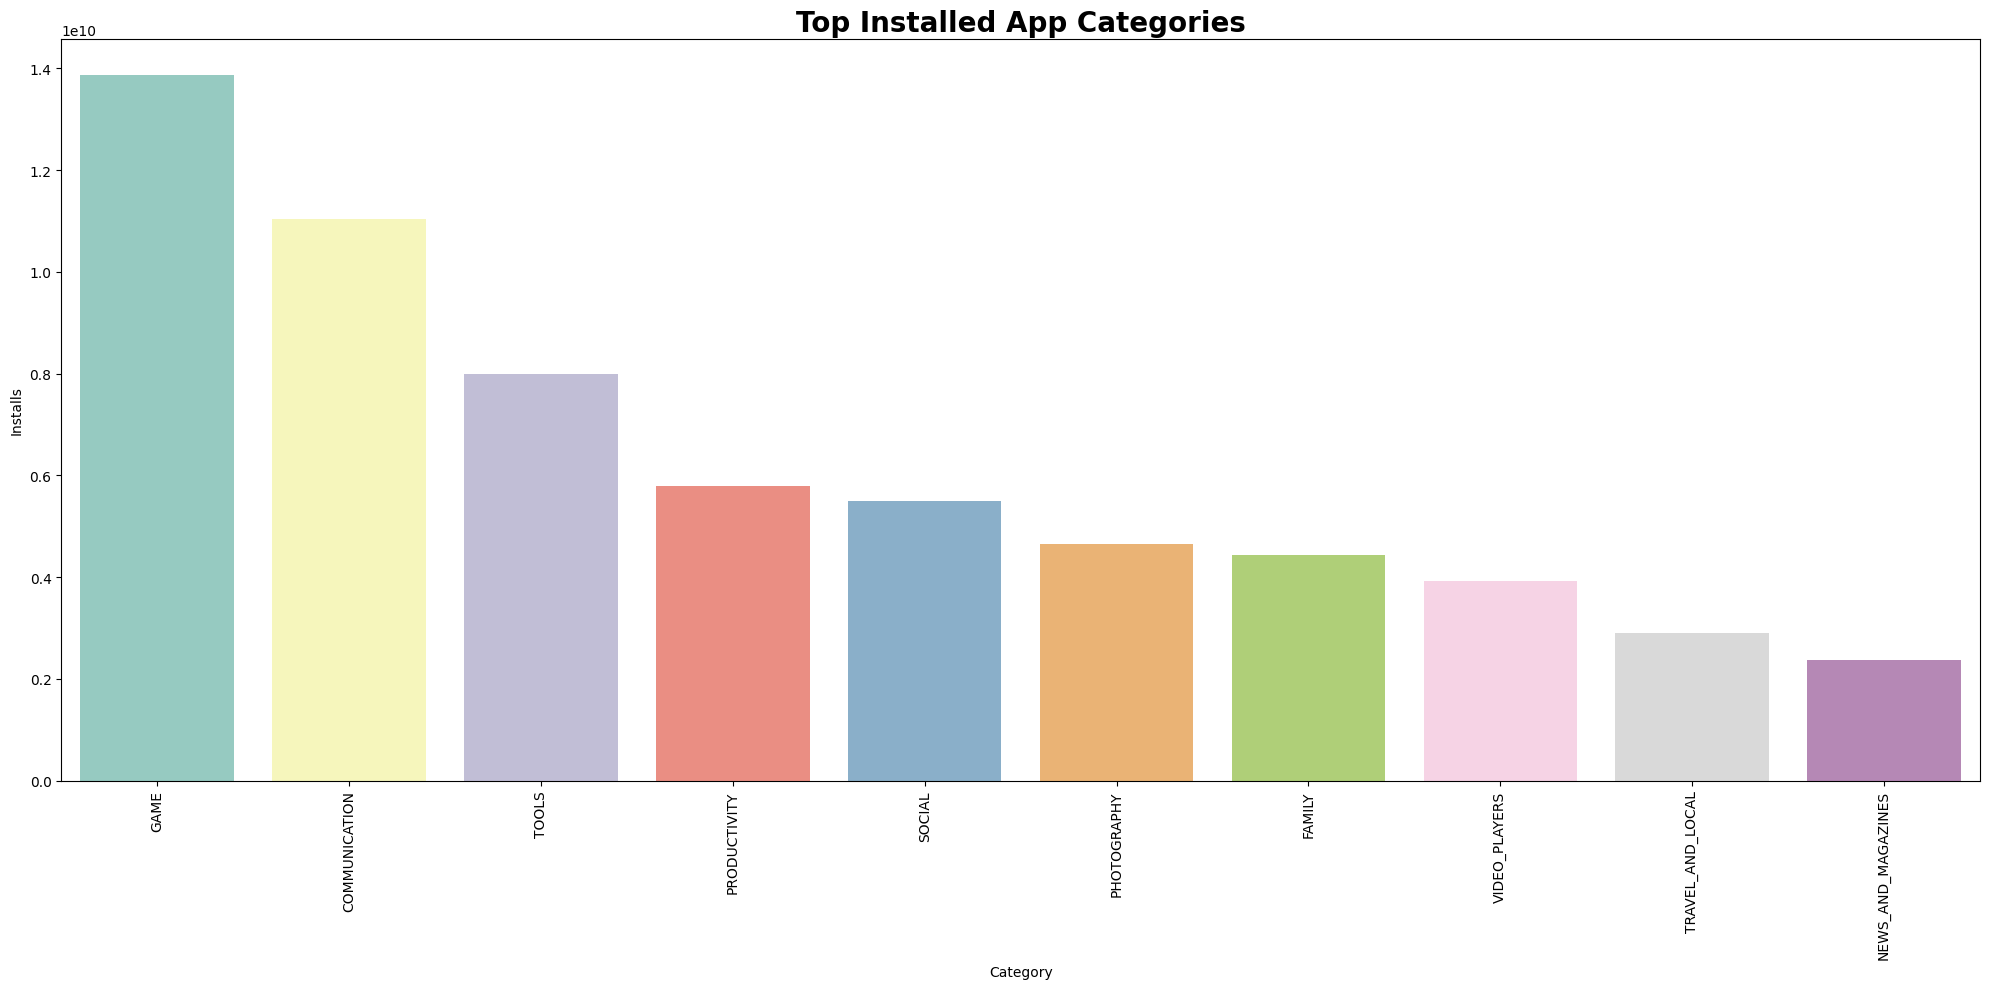

In [89]:
top_installations=df.groupby('Category')['Installs'].sum().reset_index().sort_values(by='Installs',ascending=False)
top_installations=top_installations.reset_index(drop=True)
top_installations=pd.DataFrame(top_installations)
plt.figure(figsize=(20,10))
plt.title("Top Installed App Categories",fontsize=20,fontweight='bold')
sns.barplot(x='Category',y='Installs',data=top_installations.head(10),palette='Set3')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Top 5 installed apps in each Category
df.groupby(['Category','App'])['Installs'].sum().reset_index().sort_values(['Category','Installs'],ascending=[True,False]).groupby('Category').head()

,Category,App,Installs
48,ART_AND_DESIGN,Sketch - Draw & Paint,50000000
9,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
52,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000
55,ART_AND_DESIGN,Textgram - write on photos,10000000
62,ART_AND_DESIGN,ibis Paint X,10000000
...,...,...,...
9582,WEATHER,AccuWeather: Daily Forecast & Live Weather Rep...,50000000
9598,WEATHER,"GO Weather - Widget, Theme, Wallpaper, Efficient",50000000
9627,WEATHER,The Weather Channel: Rain Forecast & Storm Alerts,50000000
9633,WEATHER,Weather & Clock Widget for Android,50000000
